# K Neighbors Salary Prediction Project

## Introduction
In this project, I've implemented a K Neighbors Regressor to predict salaries based on various features. The dataset used is 'Salary Data.csv.'

## Libraries Used

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


# Data Loading and Initial Exploration

In [63]:
df = pd.read_csv('Salary Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [65]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


# Data Preprocessing

In [66]:
df = df.dropna()

In [67]:
df.duplicated().sum()
df = df.drop_duplicates()

Encoding categorical columns using Label Encoding

In [68]:
le = LabelEncoder()
categorical_columns = [column for column in df.columns if df[column].dtype == 'object']
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

# Data Visualization
Function for plotting multiple categorical columns against Salary using seaborn

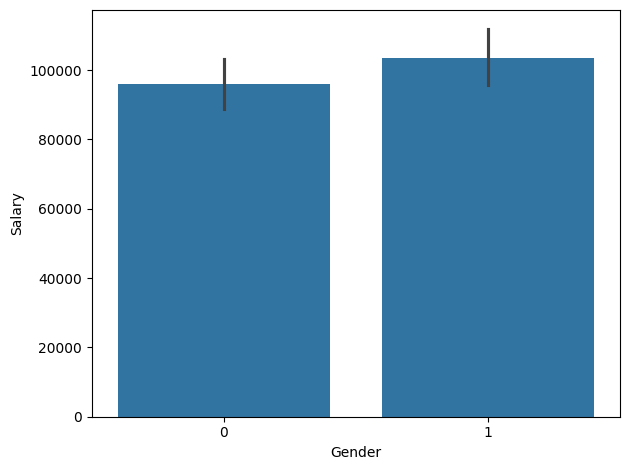

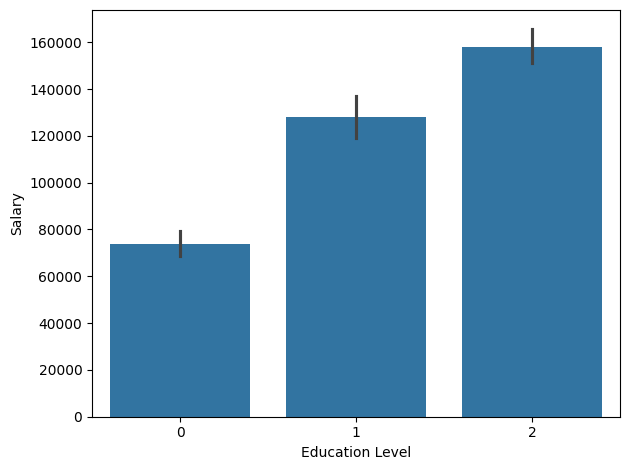

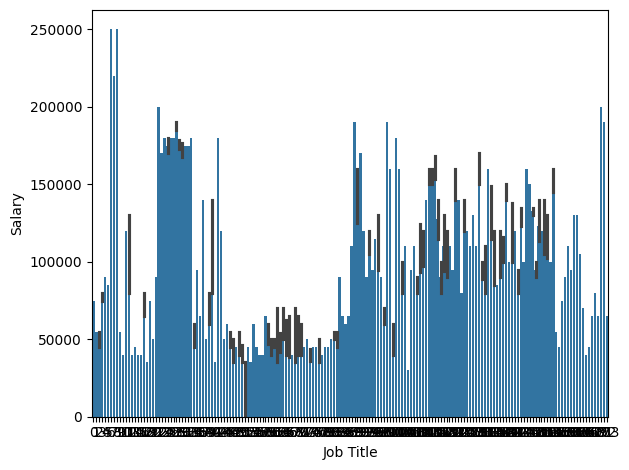

In [69]:
def multiple_plot(dataframe , x_columns , y , plotting_function):
    for i , column in enumerate(x_columns,1):
        plotting_function(dataframe,x=column,y=y)
        plt.tight_layout()
        plt.show()

multiple_plot(df,categorical_columns,'Salary',sns.barplot)



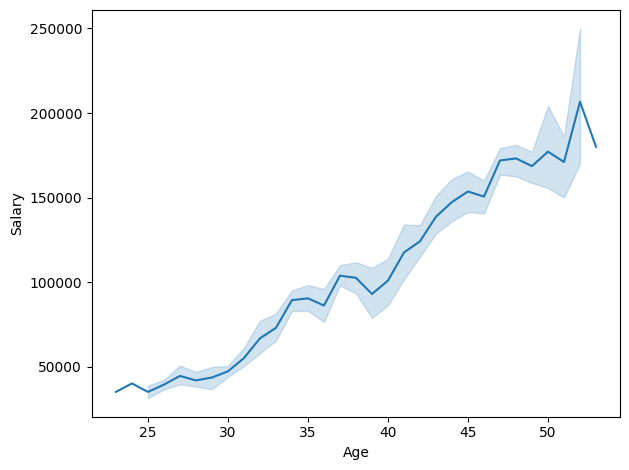

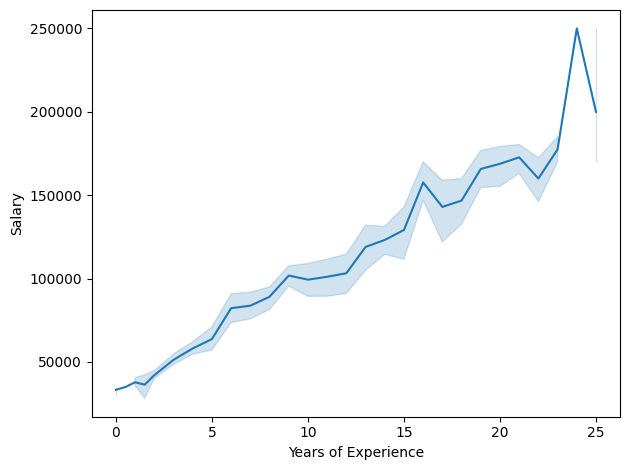

In [70]:
multiple_plot(df,['Age','Years of Experience'],'Salary',sns.lineplot)

# Data Scaling and Train-Test Split
Separating features and target variable

In [71]:
x = df.drop('Salary' , axis=1)
y = df['Salary']



Scaling features using StandardScaler

In [72]:
sc = StandardScaler()
x = sc.fit_transform(x)

Splitting the dataset into training and testing sets

In [73]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=0)

# Model Training and Evaluation
Hyperparameter tuning: Choosing the number of neighbors

In [74]:
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
mse_list = []
for n in n_neighbors:
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mse_list.append(mean_squared_error(y_test,y_pred))

Plotting MSE vs. number of neighbors

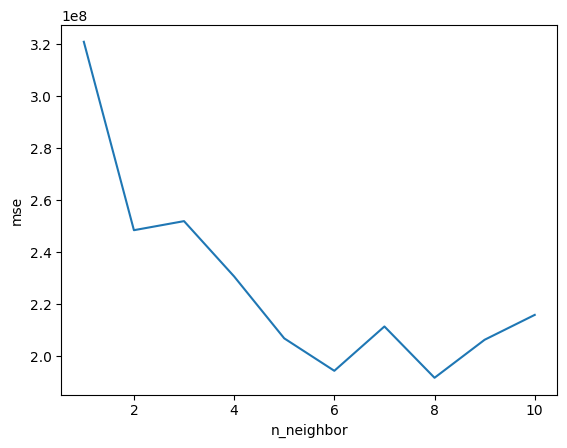

In [75]:
plt.plot(n_neighbors,mse_list)
plt.xlabel('n_neighbor')
plt.ylabel('mse')
plt.show()

Training the final model with the chosen number of neighbors

In [76]:
model = KNeighborsRegressor(n_neighbors=8)
model.fit(x_train,y_train)

# Displaying train and test accuracy scores
print(f'Train Accuracy Score : {model.score(x_train,y_train)}')
print(f'Test Accuracy Score : {model.score(x_test,y_test)}')

Train Accuracy Score : 0.9207189585929643
Test Accuracy Score : 0.9114841445974483


# Prediction

In [82]:
new_record = [[21,1,2,7,2]]
print(f'Predicted Salary for the new record: {model.predict(new_record)[0]}')

Predicted Salary for the new record: 165000.0
